# Unified Model Comparison

**Objective**: Compare all models (Temporal GCN, Static GCN, MLP + Graph Features, Baselines) across observation windows K.

**Data source**: Pre-computed results from all experiment notebooks.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 8)

## Load All Results

In [2]:
# Define result directories for each model
results_dirs = {
    'Temporal GCN': Path('../../results/evolve_gcn_multi_seed'),
    'Static GCN': Path('../../results/static_gcn_multi_seed'),
    'MLP + Graph Features': Path('../../results/graph_features_baseline'),
    'Logistic Regression': Path('../../results/baselines/logistic_regression'),
    'Random Forest': Path('../../results/baselines/random_forest'),
    'XGBoost': Path('../../results/baselines/xgboost')
}

# Load summary statistics from each model
all_models_summary = {}

for model_name, result_dir in results_dirs.items():
    # Try multi-seed format first
    csv_path = result_dir / 'multi_seed_summary_statistics.csv'
    if not csv_path.exists():
        # Try single-run format
        csv_path = result_dir / 'summary_statistics.csv'
    
    if csv_path.exists():
        df = pd.read_csv(csv_path)
        df['model'] = model_name
        all_models_summary[model_name] = df
        print(f"✓ Loaded {model_name}: {len(df)} K values")
    else:
        print(f"✗ Missing: {csv_path}")

# Combine all results
combined_summary = pd.concat(all_models_summary.values(), ignore_index=True)
print(f"\nTotal models: {len(combined_summary['model'].unique())}")
print(f"K values: {sorted(combined_summary['K'].unique())}")
print(f"\nLoaded columns: {list(combined_summary.columns)}")

✓ Loaded Temporal GCN: 4 K values
✓ Loaded Static GCN: 4 K values
✓ Loaded MLP + Graph Features: 4 K values
✓ Loaded Logistic Regression: 4 K values
✓ Loaded Random Forest: 4 K values
✓ Loaded XGBoost: 4 K values

Total models: 6
K values: [np.int64(1), np.int64(3), np.int64(5), np.int64(7)]

Loaded columns: ['K', 'F1_mean', 'F1_std', 'AUC_mean', 'AUC_std', 'Precision_mean', 'Precision_std', 'Recall_mean', 'Recall_std', 'Accuracy_mean', 'Accuracy_std', 'model', 'f1_mean', 'f1_std', 'auc_mean', 'auc_std', 'precision_mean', 'precision_std', 'recall_mean', 'recall_std', 'accuracy_mean', 'accuracy_std']


## Visualization 1: F1 Score Comparison (All Models)

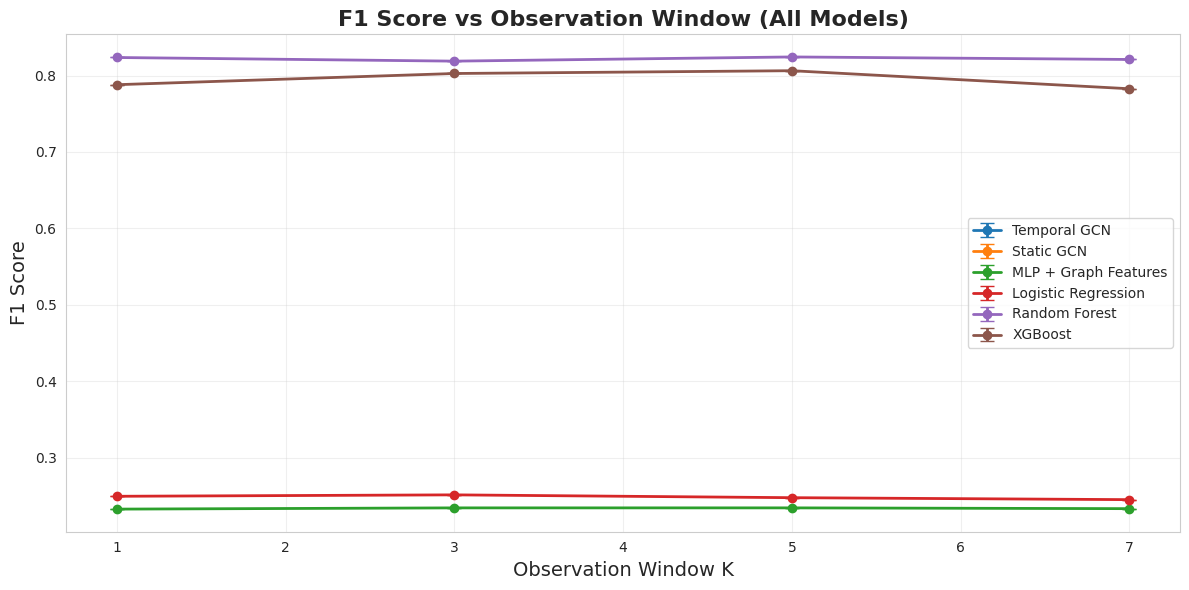

In [4]:
fig, ax = plt.subplots(figsize=(12, 6))

for model_name in results_dirs.keys():
    model_data = combined_summary[combined_summary['model'] == model_name].sort_values('K')
    ax.errorbar(
        model_data['K'],
        model_data['f1_mean'],
        yerr=model_data['f1_std'],
        marker='o',
        linewidth=2,
        capsize=5,
        label=model_name
    )

ax.set_xlabel('Observation Window K', fontsize=14)
ax.set_ylabel('F1 Score', fontsize=14)
ax.set_title('F1 Score vs Observation Window (All Models)', fontsize=16, fontweight='bold')
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Visualization 2: AUC Comparison (All Models)

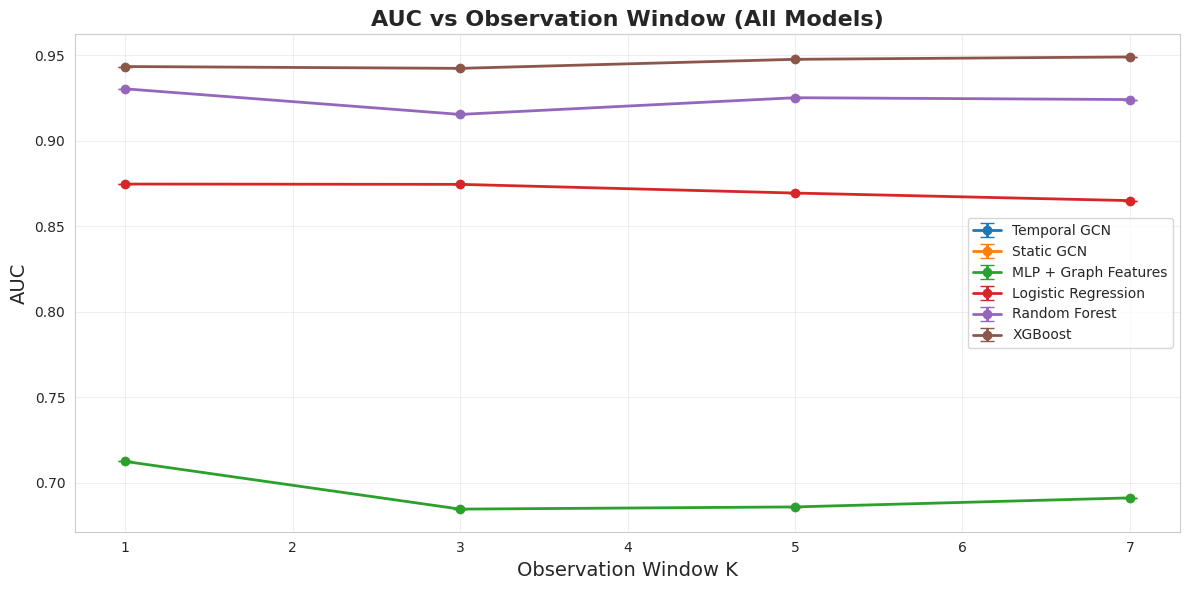

In [5]:
fig, ax = plt.subplots(figsize=(12, 6))

for model_name in results_dirs.keys():
    model_data = combined_summary[combined_summary['model'] == model_name].sort_values('K')
    ax.errorbar(
        model_data['K'],
        model_data['auc_mean'],
        yerr=model_data['auc_std'],
        marker='o',
        linewidth=2,
        capsize=5,
        label=model_name
    )

ax.set_xlabel('Observation Window K', fontsize=14)
ax.set_ylabel('AUC', fontsize=14)
ax.set_title('AUC vs Observation Window (All Models)', fontsize=16, fontweight='bold')
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Visualization 3: Heatmap (F1 Scores)

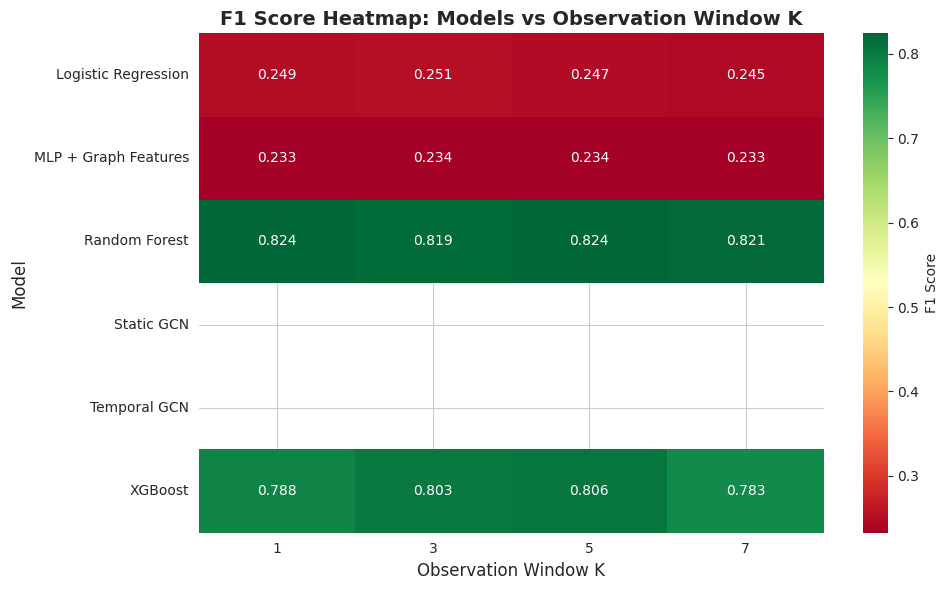

In [6]:
# Create pivot table for heatmap
f1_pivot = combined_summary.pivot(index='model', columns='K', values='f1_mean')

fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(f1_pivot, annot=True, fmt='.3f', cmap='RdYlGn', ax=ax, cbar_kws={'label': 'F1 Score'})
ax.set_title('F1 Score Heatmap: Models vs Observation Window K', fontsize=14, fontweight='bold')
ax.set_xlabel('Observation Window K', fontsize=12)
ax.set_ylabel('Model', fontsize=12)
plt.tight_layout()
plt.show()

## Visualization 4: Best Model per K

In [ ]:
# Find best model for each K
best_per_k_f1 = combined_summary.loc[combined_summary.groupby('K')['f1_mean'].idxmax()]
best_per_k_auc = combined_summary.loc[combined_summary.groupby('K')['auc_mean'].idxmax()]

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Best F1
ax = axes[0]
ax.bar(best_per_k_f1['K'], best_per_k_f1['f1_mean'], color='steelblue', alpha=0.7)
ax.errorbar(best_per_k_f1['K'], best_per_k_f1['f1_mean'], 
            yerr=best_per_k_f1['f1_std'], fmt='none', color='black', capsize=5)
for i, (k, model) in enumerate(zip(best_per_k_f1['K'], best_per_k_f1['model'])):
    ax.text(k, best_per_k_f1['f1_mean'].iloc[i] + 0.02, model, 
            ha='center', fontsize=9, rotation=45)
ax.set_xlabel('Observation Window K', fontsize=12)
ax.set_ylabel('Best F1 Score', fontsize=12)
ax.set_title('Best Model by F1 Score per K', fontsize=13, fontweight='bold')
ax.grid(True, alpha=0.3, axis='y')

# Best AUC
ax = axes[1]
ax.bar(best_per_k_auc['K'], best_per_k_auc['auc_mean'], color='green', alpha=0.7)
ax.errorbar(best_per_k_auc['K'], best_per_k_auc['auc_mean'], 
            yerr=best_per_k_auc['auc_std'], fmt='none', color='black', capsize=5)
for i, (k, model) in enumerate(zip(best_per_k_auc['K'], best_per_k_auc['model'])):
    ax.text(k, best_per_k_auc['auc_mean'].iloc[i] + 0.02, model, 
            ha='center', fontsize=9, rotation=45)
ax.set_xlabel('Observation Window K', fontsize=12)
ax.set_ylabel('Best AUC', fontsize=12)
ax.set_title('Best Model by AUC per K', fontsize=13, fontweight='bold')
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

## Visualization 5: Model Stability (Variance Analysis)

In [ ]:
# Average std across all K values for each model
stability = combined_summary.groupby('model').agg({
    'f1_std': 'mean',
    'auc_std': 'mean'
}).sort_values('f1_std')

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# F1 Stability
ax = axes[0]
stability['f1_std'].plot(kind='barh', ax=ax, color='coral')
ax.set_xlabel('Average F1 Std Deviation', fontsize=12)
ax.set_ylabel('Model', fontsize=12)
ax.set_title('Model Stability (F1 Variance)', fontsize=13, fontweight='bold')
ax.grid(True, alpha=0.3, axis='x')

# AUC Stability
ax = axes[1]
stability['auc_std'].plot(kind='barh', ax=ax, color='skyblue')
ax.set_xlabel('Average AUC Std Deviation', fontsize=12)
ax.set_ylabel('Model', fontsize=12)
ax.set_title('Model Stability (AUC Variance)', fontsize=13, fontweight='bold')
ax.grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

print("\nModel Stability Ranking (lower std = more stable):")
print(stability)

## Comparison Tables

In [ ]:
# Create formatted comparison table
comparison_table = combined_summary.copy()
comparison_table['F1'] = comparison_table.apply(
    lambda x: f"{x['f1_mean']:.3f} ± {x['f1_std']:.3f}", axis=1
)
comparison_table['AUC'] = comparison_table.apply(
    lambda x: f"{x['auc_mean']:.3f} ± {x['auc_std']:.3f}", axis=1
)
comparison_table['Precision'] = comparison_table.apply(
    lambda x: f"{x['precision_mean']:.3f} ± {x['precision_std']:.3f}", axis=1
)
comparison_table['Recall'] = comparison_table.apply(
    lambda x: f"{x['recall_mean']:.3f} ± {x['recall_std']:.3f}", axis=1
)

display_table = comparison_table[['model', 'K', 'F1', 'AUC', 'Precision', 'Recall']].sort_values(['K', 'model'])

print("\n" + "="*80)
print("COMPREHENSIVE MODEL COMPARISON (Test Set, Mean ± Std)")
print("="*80)
print(display_table.to_string(index=False))

# Best performers
print("\n" + "="*80)
print("BEST PERFORMERS")
print("="*80)
print("\nBest F1 Score per K:")
print(best_per_k_f1[['K', 'model', 'f1_mean', 'f1_std']].to_string(index=False))
print("\nBest AUC per K:")
print(best_per_k_auc[['K', 'model', 'auc_mean', 'auc_std']].to_string(index=False))

## Save Combined Results

In [ ]:
# Save combined results
output_dir = Path('../../results')
output_dir.mkdir(parents=True, exist_ok=True)

# Save summary statistics
combined_summary.to_csv(output_dir / 'all_models_comparison.csv', index=False)
print(f"✓ Saved: {output_dir / 'all_models_comparison.csv'}")

# Save formatted table
display_table.to_csv(output_dir / 'comparison_formatted.csv', index=False)
print(f"✓ Saved: {output_dir / 'comparison_formatted.csv'}")

print("\n✅ All comparison results saved!")